### Zomato

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('zomato.csv',encoding='latin-1',sep=',')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Let's Visualize the % of data from diffrent countries

[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
[22, 60, 434, 24, 4, 20, 60, 8652, 21, 40, 80, 20, 60, 20, 34]


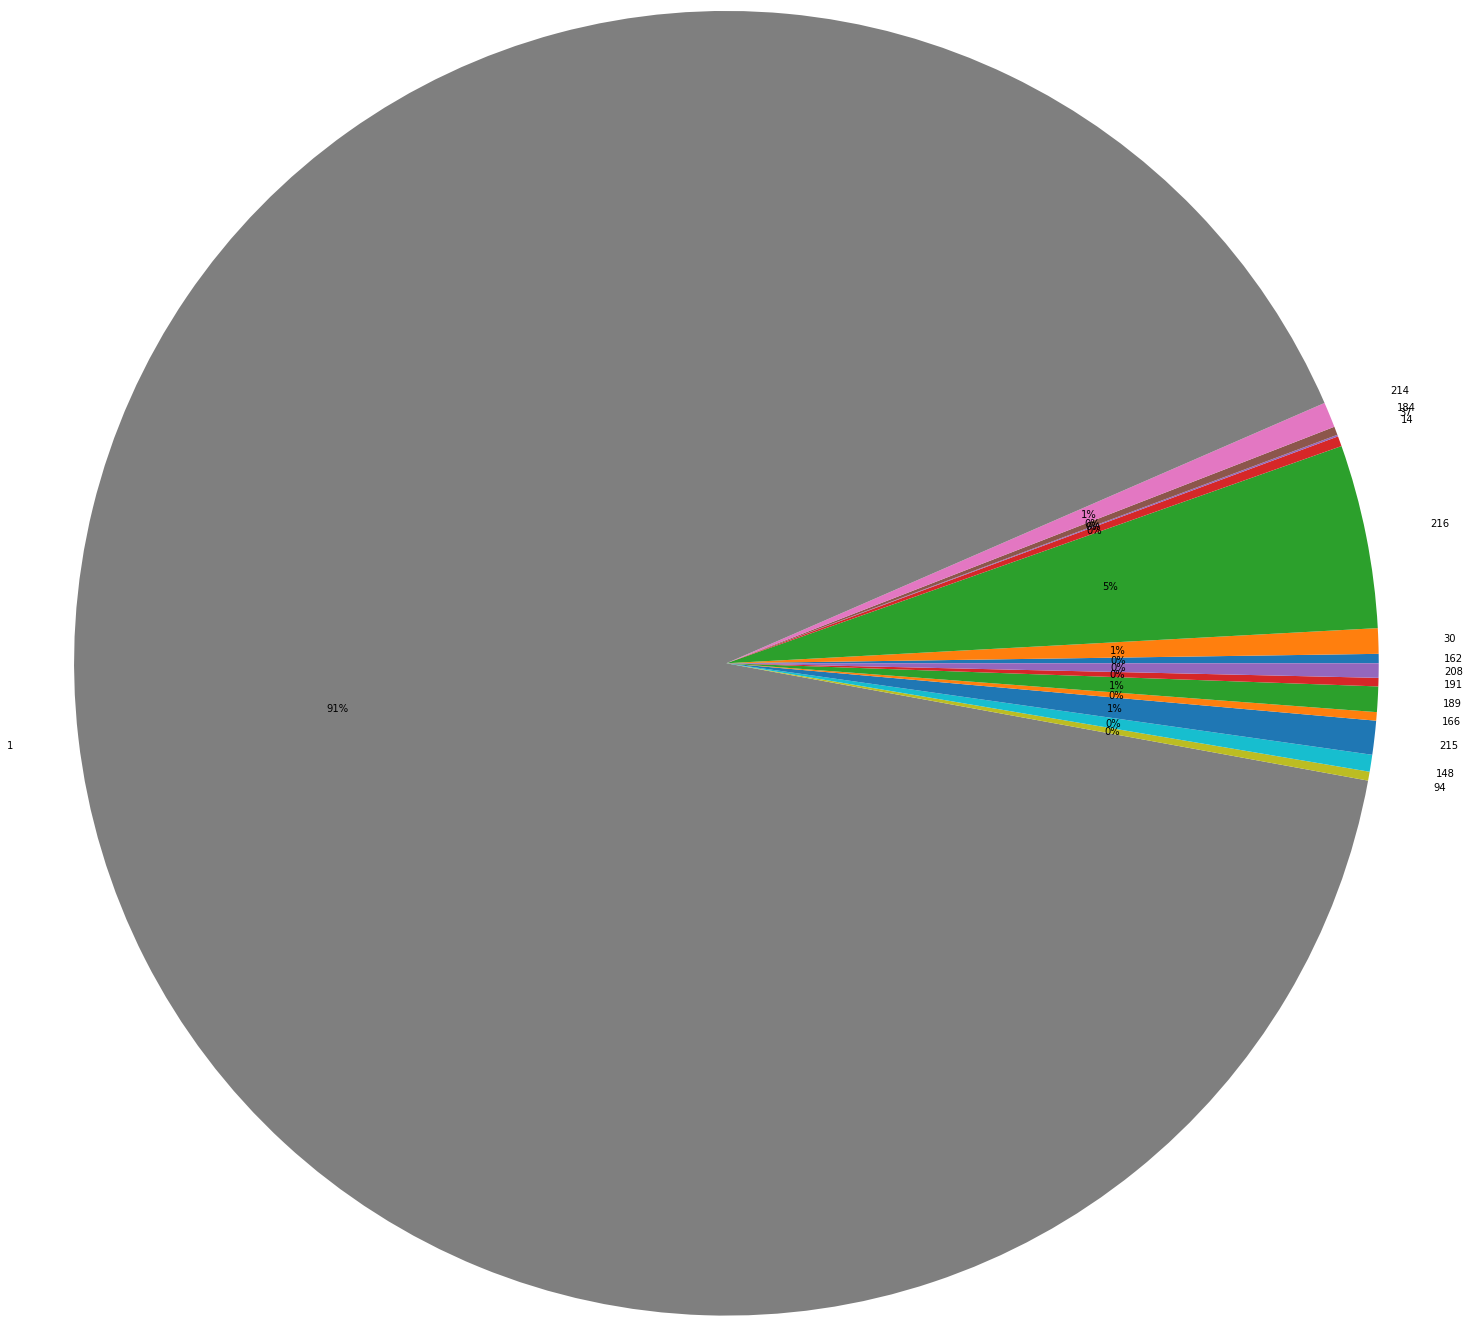

In [7]:

countries = df['Country Code'].unique()
print(countries)
arr = []
plt.figure(figsize=(28,15))
for c in countries:
    dframe = df[df['Country Code']==c]
    n = dframe['Country Code'].count()
    arr.append(n)
print(arr)

import matplotlib.pyplot as plt
plt.pie(arr, labels = countries, autopct='%.0f%%', radius = 2)
plt.show()

We Can see from the above figure that 91% of the data comes from the country code 1 (India) Hence, we can take only the data from India for our Analysis.

In [8]:
dfIndia=df[df['Country Code']==1]
dfIndia=dfIndia.reset_index(drop=True) #reseting the indices
dfIndia.head(n=3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94


#### Let's clean up a few fields of the Data

In [9]:
dfIndia.isnull().values.any() # Checking for Null Values

False

There are no null values in the Data

In [10]:

print(dfIndia['Has Table booking'].unique())
print(dfIndia['Has Online delivery'].unique())
print(dfIndia['Is delivering now'].unique())
print(dfIndia['Rating text'].unique())

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Good' 'Very Good' 'Average' 'Excellent' 'Not rated' 'Poor']


Encoding the Data and dropping the 'Not rated rows'

In [11]:
cleanup = {'Has Table booking': {'Yes': 1, 'No': 0}, #Encoding Yes as 1 and No as 0
           'Has Online delivery': {'Yes': 1, 'No': 0},
           'Is delivering now' : {'Yes': 1, 'No': 0},
           'Rating text' : {'Not rated': 0, 'Poor': 1, 'Average': 2, 'Good': 3, 'Very Good': 4, 'Excellent' : 5}}
dfIndia.replace(cleanup, inplace = True)
noRatng = dfIndia[dfIndia['Rating text']==0]
print(noRatng['Rating text'].count())
dfIndia = dfIndia[dfIndia['Rating text']!=0]
dfIndia.head()

2139


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),0,0,0,No,3,3.9,Yellow,3,140
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),0,0,0,No,2,3.5,Yellow,3,71
2,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),0,0,0,No,2,3.6,Yellow,3,94
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),0,0,0,No,2,4.0,Green,4,87
4,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),0,0,0,No,3,4.2,Green,4,177


Calculating the number of 0s in the columns,Avg. Cost of two and replacing it with the mean

In [12]:
totalzero = (dfIndia['Average Cost for two']== 0).sum()
print(totalzero)
n_sum = dfIndia['Average Cost for two'].sum()
n_total = dfIndia['Average Cost for two'].count()
print(n_sum/n_total)
cleanzero = {'Average Cost for two': {0: 700}}
dfIndia.replace(cleanzero, inplace = True)

9
715.9097190234914


#### Let us now Visualize the graphs of different fields and check the relationships
Different Cities of India in the Data Set

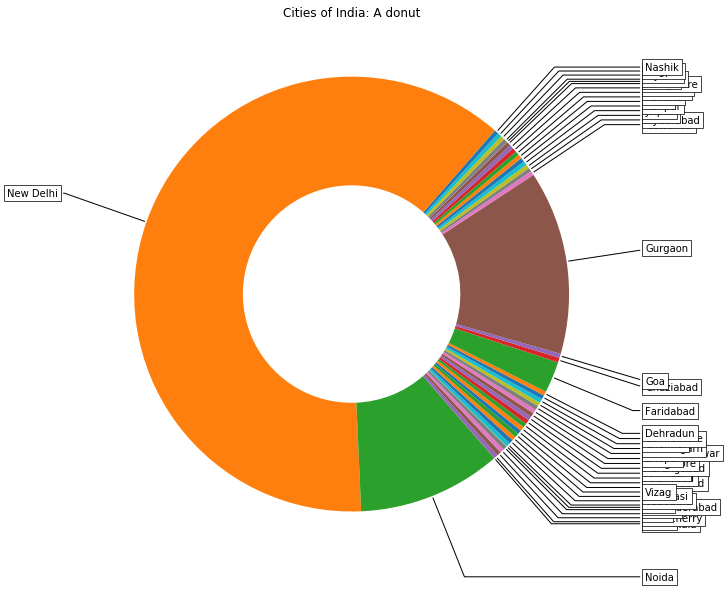

In [13]:
cities = dfIndia['City'].unique()
citycount = []
for c in cities:
    dframe = dfIndia[dfIndia['City']==c]
    n = dframe['City'].count()
    citycount.append(n)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
city = cities
data = citycount

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(city[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Cities of India: A donut")

plt.show()


We can see that the city of New Delhi, Gurgaon and Noida dominate the data set

Will the number of votes influence the Rating?

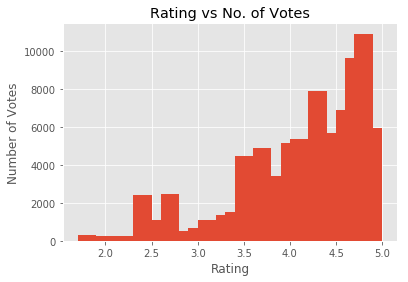

In [14]:
plt.style.use('ggplot')
a = dfIndia['Aggregate rating']
b = dfIndia['Votes']
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.title('Rating vs No. of Votes')
plt.bar(a,b, width = 0.2, linewidth = 10, linestyle = 'solid')
plt.show()

From the graph, it's highly evident that, higher the number of votes, higher is the rating.

Will the average cost for two influence the rating?

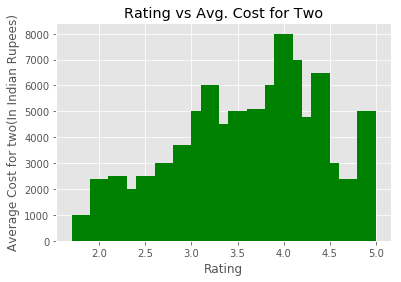

In [15]:
plt.style.use('ggplot')
x = dfIndia['Aggregate rating']
y = dfIndia['Average Cost for two']
plt.xlabel('Rating')
plt.ylabel('Average Cost for two(In Indian Rupees)')
plt.title('Rating vs Avg. Cost for Two')
plt.bar(x,y, width = 0.2, linewidth = 10, linestyle = 'solid', color = 'green')
plt.show()

We can see from the above graph that as the average cost for two increases, the ratings go higher. But it decreases after the Rating of 4.0. Hence, we can say that there are a few high rated restaurants with lesser average cost for two.

From the Dataset, we can see that the 'Cuisines' Column has multiple values.
We can take only the Main cuisine of the restaurant and do One-hot encoding on the different types of cusines.

In [16]:
dftemp = pd.concat([dfIndia, dfIndia['Cuisines'].str.split(',',expand=True)], axis = 1) #Expanding the different values in cuisines
dftemp = dftemp.rename(columns={0:'Cuisine 1'}) #Renaming the Main Cusine as Cuisine 1
dftemp = dftemp.drop(1,axis =1) # Dropping all other Cuisine Values
dftemp = dftemp.drop(2,axis =1)
dftemp = dftemp.drop(3,axis =1)
dftemp = dftemp.drop(4,axis =1)
dftemp = dftemp.drop(5,axis =1)
dftemp = dftemp.drop(6,axis =1)
dftemp = dftemp.drop(7,axis =1)

dfClean = pd.get_dummies(dftemp, columns = ['Cuisine 1']) #One-hot encoding
dfClean.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Cuisine 1_Spanish,Cuisine 1_Steak,Cuisine 1_Street Food,Cuisine 1_Sushi,Cuisine 1_Tea,Cuisine 1_Tex-Mex,Cuisine 1_Thai,Cuisine 1_Tibetan,Cuisine 1_Turkish,Cuisine 1_Vietnamese
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,0,0,0,0,0,0,0,0,0,0
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,0,0,0,0,0,0,0,0,0,0
2,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,0,0,0,0,0,0,0,0,0,0
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,0,0,0,0,0,0,0,0,0,0
4,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,0,0,0,0,0,0,0,0,0,0


In [17]:
dfCleanIndia = dfClean.drop(['Cuisines', 'Country Code', 'Rating color', 'Switch to order menu', 'Currency', 'Address', 'Locality', 'Locality Verbose'],  axis =1)
cols = list(dfCleanIndia.columns.values)
cols.pop(cols.index('Rating text'))
cols.pop(cols.index('Aggregate rating'))
dfCleanIndia = dfCleanIndia[cols+['Rating text']+['Aggregate rating']]
dfCleanIndia.head()

,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,...,Cuisine 1_Street Food,Cuisine 1_Sushi,Cuisine 1_Tea,Cuisine 1_Tex-Mex,Cuisine 1_Thai,Cuisine 1_Tibetan,Cuisine 1_Turkish,Cuisine 1_Vietnamese,Rating text,Aggregate rating
0,3400025,Jahanpanah,Agra,78.011544,27.161661,850,0,0,0,3,...,0,0,0,0,0,0,0,0,3,3.9
1,3400341,Rangrezz Restaurant,Agra,0.000000,0.000000,700,0,0,0,2,...,0,0,0,0,0,0,0,0,3,3.5
2,3400005,Time2Eat - Mama Chicken,Agra,78.011608,27.160832,500,0,0,0,2,...,0,0,0,0,0,0,0,0,3,3.6
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,77.998092,27.195928,400,0,0,0,2,...,0,0,0,0,0,0,0,0,4,4.0
4,3400017,Pinch Of Spice,Agra,78.007553,27.201725,1000,0,0,0,3,...,0,0,0,0,0,0,0,0,4,4.2


#### Machine Learning of the Cleaned Zomato Data

In [18]:
df = pd.read_csv('ZomatoIndiaCleaned.csv', encoding = 'latin-1', sep = ',')
df.head()

,Unnamed: 0,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,...,Cuisine 1_Street Food,Cuisine 1_Sushi,Cuisine 1_Tea,Cuisine 1_Tex-Mex,Cuisine 1_Thai,Cuisine 1_Tibetan,Cuisine 1_Turkish,Cuisine 1_Vietnamese,Rating text,Aggregate rating
0,0,3400025,Jahanpanah,Agra,78.011544,27.161661,850,0,0,0,...,0,0,0,0,0,0,0,0,3,3.9
1,1,3400341,Rangrezz Restaurant,Agra,0.000000,0.000000,700,0,0,0,...,0,0,0,0,0,0,0,0,3,3.5
2,2,3400005,Time2Eat - Mama Chicken,Agra,78.011608,27.160832,500,0,0,0,...,0,0,0,0,0,0,0,0,3,3.6
3,3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,77.998092,27.195928,400,0,0,0,...,0,0,0,0,0,0,0,0,4,4.0
4,4,3400017,Pinch Of Spice,Agra,78.007553,27.201725,1000,0,0,0,...,0,0,0,0,0,0,0,0,4,4.2


#### Let us build a Classification Model for Prediciting the rating of a restaurant.

Target Value: Rating Text (Values: 1,2,3,4,5)

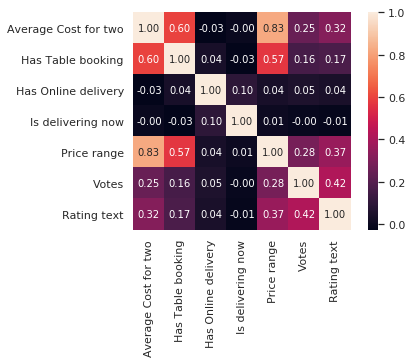

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['Average Cost for two', 'Has Table booking', 'Has Online delivery',  'Is delivering now', 'Price range', 'Votes', 'Rating text',]
cor_matrix = np.corrcoef(df[cols].values.T) # We transpose to get the data by columns. Columns become rows.
sns.set(font_scale=1)
cor_heat_map = sns.heatmap(cor_matrix,
 cbar=True,
 annot=True,
 square=True,
 fmt='.2f',
 annot_kws={'size':10},
 yticklabels=cols,
 xticklabels=cols)
plt.show()

From the above Heat map, we can see that the Target Value (Rating text) is correlated well with the 'number of votes', 'price Range' and 'average cost for two', with correlation values being 0.42, 0.37 and 0.32 respectively.

We can also draw many other inferences like, Average cost for two and price range has a very high correlation value of 0.83 which says that Average cost for two and price range are highly dependent on each other.

In [21]:
x = df.iloc[:,6:86] #Features
y = df.iloc[:,86] #Target Value - Rating Text
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.4, random_state = 1) # Splitting the Data into Training and Test with test size as 20%

#### Let us Start building Machine Learning Models and predict the accuracy score

Model 1: Decision Tree Classification

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
dtree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 1, max_depth=5, min_samples_leaf=10)
dtree_gini.fit(X_train, y_train)
dtree_gini_pred = dtree_gini.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, dtree_gini_pred)*100)
cm = confusion_matrix(y_test, dtree_gini_pred)
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=dtree_gini_pred)) #Printing the Classification report to view precision, recall and f1 scores

Decision Tree Accuracy: 66.9224865694551
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        63
           2       0.80      0.85      0.82      1479
           3       0.50      0.56      0.53       758
           4       0.35      0.26      0.30       267
           5       0.00      0.00      0.00        39

    accuracy                           0.67      2606
   macro avg       0.33      0.33      0.33      2606
weighted avg       0.64      0.67      0.65      2606



/home/pandit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pandit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pandit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Decision Tree With Ada Boost

In [23]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
    n_estimators=60,
    learning_rate=1.5, algorithm="SAMME")
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print('Decision Tree with Ada Boost Accuracy:', accuracy_score(y_test, ada_pred)*100)

Decision Tree with Ada Boost Accuracy: 64.58173445894091


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, oob_score=True)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy:', accuracy*100)
print('Random Forest Out-of-bag score estimate:', rf.oob_score_*100)

Random Forest Accuracy: 65.57943207981582
Random Forest Out-of-bag score estimate: 63.42462247248528


In [25]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

nn_pred = mlp.predict(X_test)
score = accuracy_score(y_test, nn_pred)
print('Artificial Neural Network Accuracy:', score*100)

Artificial Neural Network Accuracy: 66.42363775901765


### Conclusions:
Data Analysis Showed that Rating is dependent on Average cost of two and also number of votes
Correlation Matrix showed that the Average cost for two and price range are highly dependent on each other
Correlation Matrix also showed that Rating text is correlated well with the 'number of votes', 'price Range' and 'average cost for two'
Of all the 5 Models, the best accuracy that we are getting is for the decision tree classifier with the accuracy of around 67%. This means that the Decision Tree model is predicting nearly 67% of the test data accurately
Future works include: Hyper Parameter Tuning and using other boosting techniques like Xgboost
Can improve the accuracy by converting the data into a binary classification problem and combining it